In [ ]:
import pandas as pd

df = pd.read_csv('/content/retail_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

In [ ]:

df['stockout'] = df['Inventory Level'].apply(lambda x: 1 if x == 0 else 0)
print(df.describe().T)

                      count        mean         std   min       25%    50%  \
Inventory Level     76000.0  301.062842  226.510161  0.00  136.0000  227.0   
Units Sold          76000.0   88.827316   43.994525  0.00   58.0000   84.0   
Units Ordered       76000.0   89.090645  162.404627  0.00    0.0000    0.0   
Price               76000.0   67.726028   39.377899  4.74   31.9975   64.5   
Discount            76000.0    9.087039    7.475781  0.00    5.0000   10.0   
Promotion           76000.0    0.328947    0.469834  0.00    0.0000    0.0   
Competitor Pricing  76000.0   69.454029   40.943818  4.29   32.6200   65.7   
Epidemic            76000.0    0.200000    0.400003  0.00    0.0000    0.0   
Demand              76000.0  104.317158   46.964801  4.00   71.0000  100.0   
stockout            76000.0    0.005342    0.072895  0.00    0.0000    0.0   

                         75%      max  
Inventory Level     408.0000  2267.00  
Units Sold          114.0000   426.00  
Units Ordered       1

In [ ]:
total_stockouts = df['stockout'].sum()
total_observations = len(df)
overall_stockout_rate = (total_stockouts / total_observations) * 100
print(f"Total stockouts: {total_stockouts}")
print(f"Total observations: {total_observations}")
print(f"Overall stockout rate: {overall_stockout_rate:.4f}%")


Total stockouts: 406
Total observations: 76000
Overall stockout rate: 0.5342%


In [ ]:
# prompt: groupby('Product ID') and store ID both

product_store_stockout_rate = df.groupby(['Product ID', 'Store ID'])['stockout'].mean() * 100
print("\nStockout rate per product and store:")
product_store_stockout_rate


Stockout rate per product and store:


Product ID  Store ID
P0001       S001        0.000000
            S002        0.657895
            S003        1.052632
            S004        1.184211
            S005        1.184211
                          ...   
P0020       S001        0.394737
            S002        0.921053
            S003        1.184211
            S004        0.526316
            S005        0.000000
Name: stockout, Length: 100, dtype: float64

In [ ]:
store_stockouts = df.groupby('Store ID')['stockout'].sum().reset_index()
store_stockouts_sorted = store_stockouts.sort_values(by='stockout', ascending=False)
print(store_stockouts_sorted)


  Store ID  stockout
1     S002        93
4     S005        91
2     S003        85
3     S004        78
0     S001        59


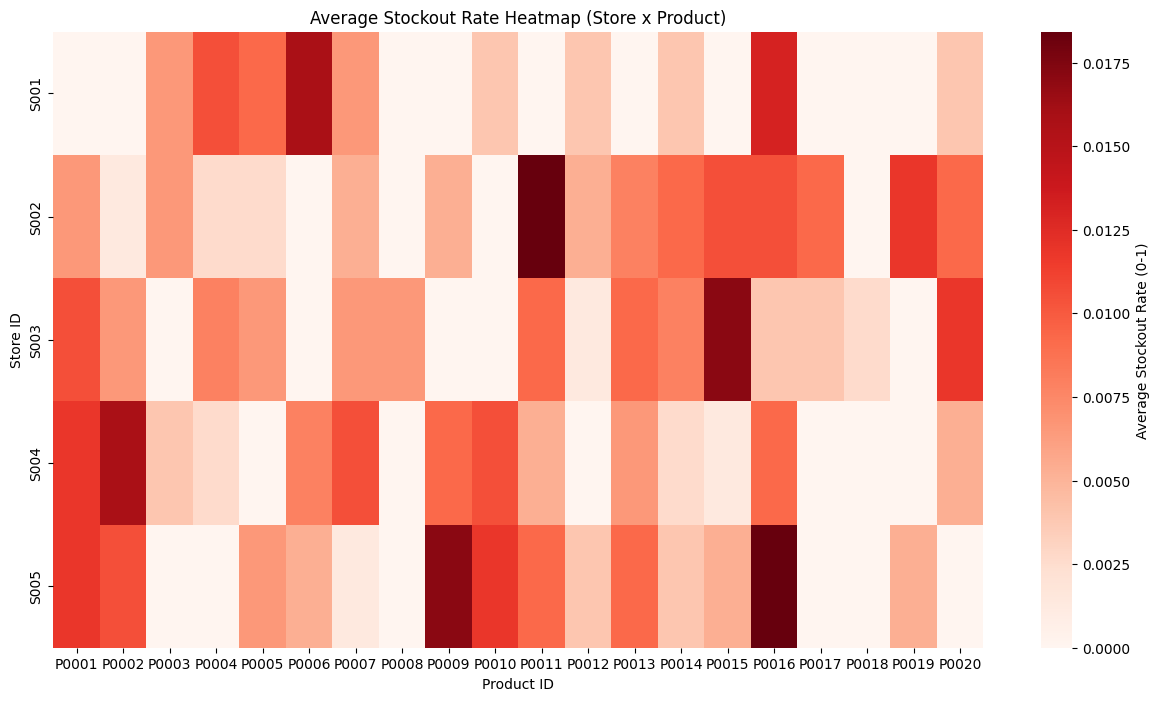

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

stockout_matrix = df.pivot_table(index='Store ID', columns='Product ID', values='stockout', aggfunc='mean', fill_value=0)
plt.figure(figsize=(15, 8))
sns.heatmap(stockout_matrix, cmap='Reds', cbar_kws={'label': 'Average Stockout Rate (0-1)'})
plt.title('Average Stockout Rate Heatmap (Store x Product)')
plt.xlabel('Product ID')
plt.ylabel('Store ID')
plt.show()


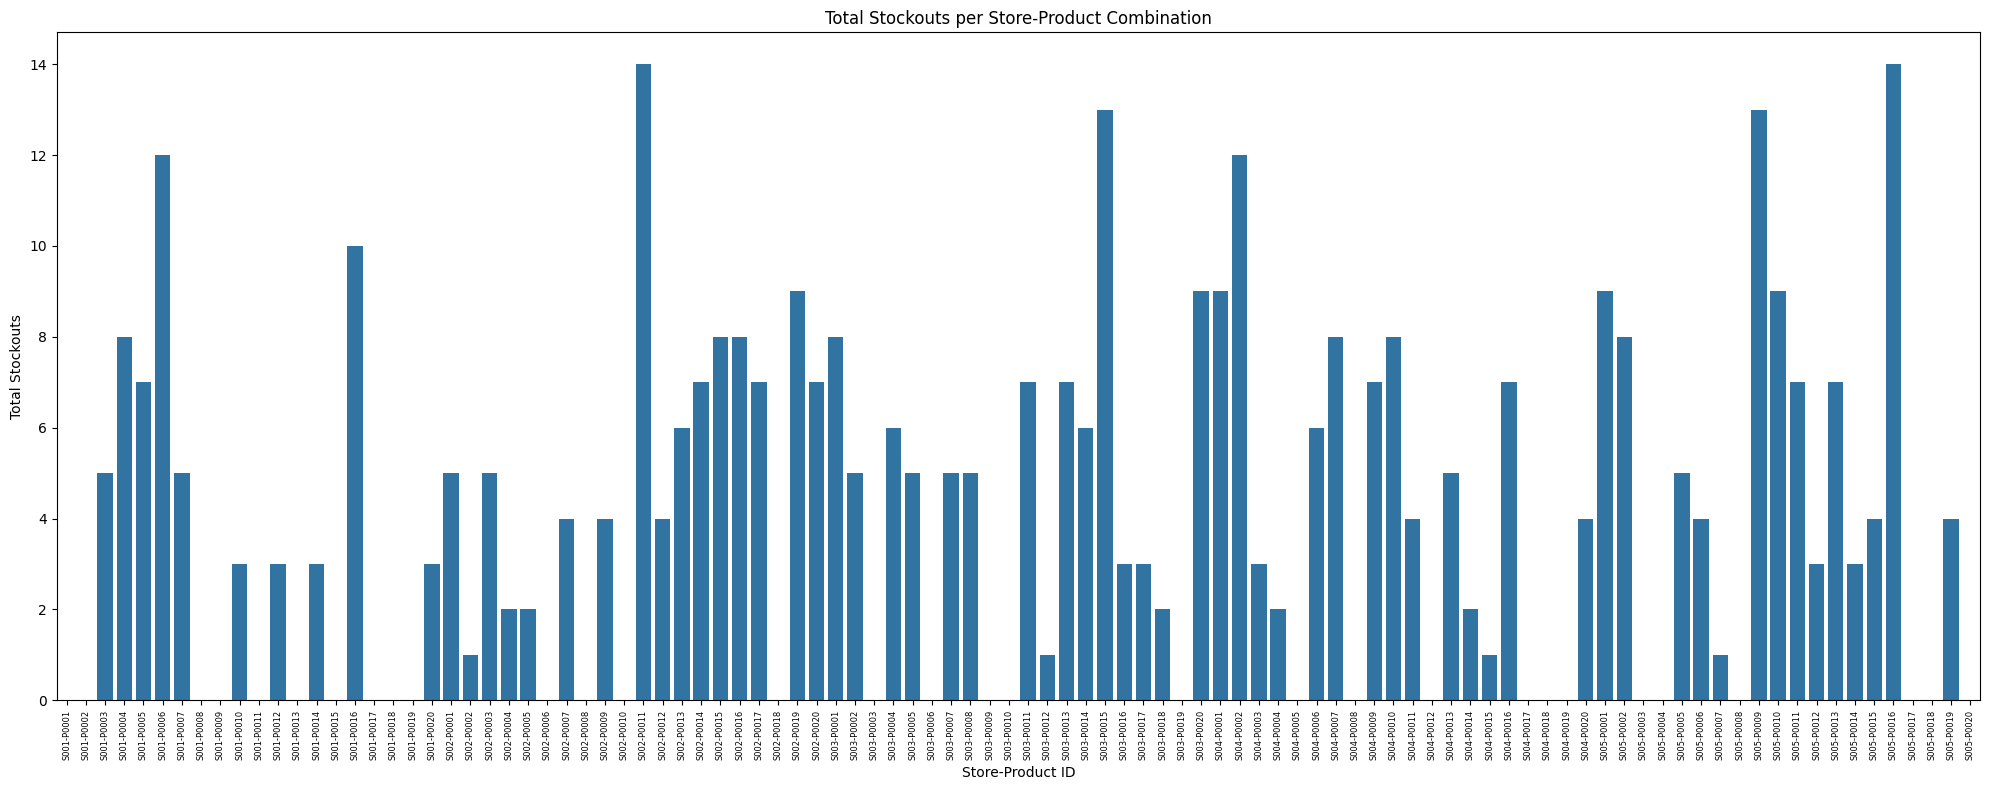

In [ ]:
stockout_counts = df.groupby(['Store ID', 'Product ID'])['stockout'].sum().reset_index()
stockout_counts['Store-Product'] = stockout_counts['Store ID'].astype(str) + '-' + stockout_counts['Product ID'].astype(str)
plt.figure(figsize=(20, 8))
sns.barplot(x='Store-Product', y='stockout', data=stockout_counts)
plt.title('Total Stockouts per Store-Product Combination')
plt.xlabel('Store-Product ID')
plt.ylabel('Total Stockouts')
plt.xticks(rotation=90, fontsize=6)
plt.tight_layout()
plt.show()


In [ ]:
category_stockouts = df.groupby('Category')['stockout'].sum().sort_values(ascending=False)
print(category_stockouts)


Category
Groceries      208
Clothing        55
Toys            51
Furniture       46
Electronics     46
Name: stockout, dtype: int64


In [ ]:
promo_stockouts = df.groupby('Promotion')['stockout'].sum()
print(promo_stockouts)


Promotion
0    252
1    154
Name: stockout, dtype: int64


In [ ]:
season_stockouts = df.groupby('Seasonality')['stockout'].sum()
epidemic_stockouts = df.groupby('Epidemic')['stockout'].sum()
print(season_stockouts)
print(epidemic_stockouts)


Seasonality
Autumn     89
Spring     86
Summer     97
Winter    134
Name: stockout, dtype: int64
Epidemic
0    358
1     48
Name: stockout, dtype: int64


## Total Stockouts per Product

   Product ID  stockout
15      P0016        42
10      P0011        32
0       P0001        31
1       P0002        26
14      P0015        26
12      P0013        25
8       P0009        24
19      P0020        23
6       P0007        23
5       P0006        22
13      P0014        21
9       P0010        20
4       P0005        19
3       P0004        18
2       P0003        13
18      P0019        13
11      P0012        11
16      P0017        10
7       P0008         5
17      P0018         2

## Total Stockouts per Store

  Store ID  stockout
1     S002        93
4     S005        91
2     S003        85
3     S004        78
0     S001        59


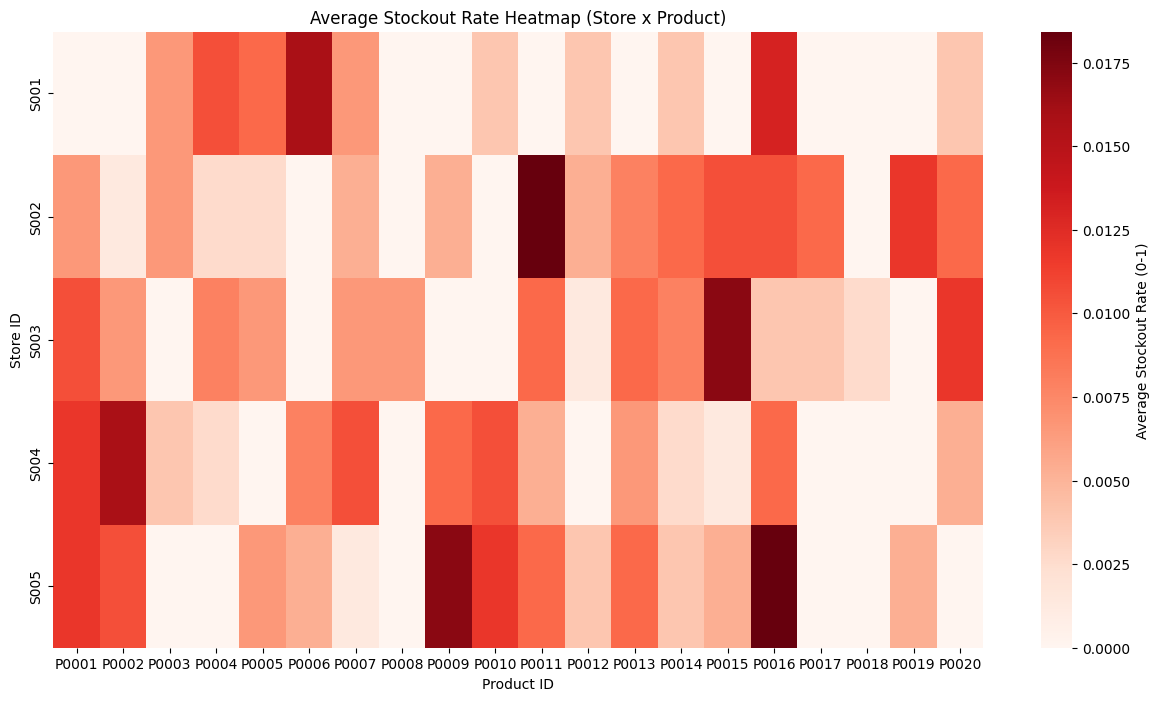

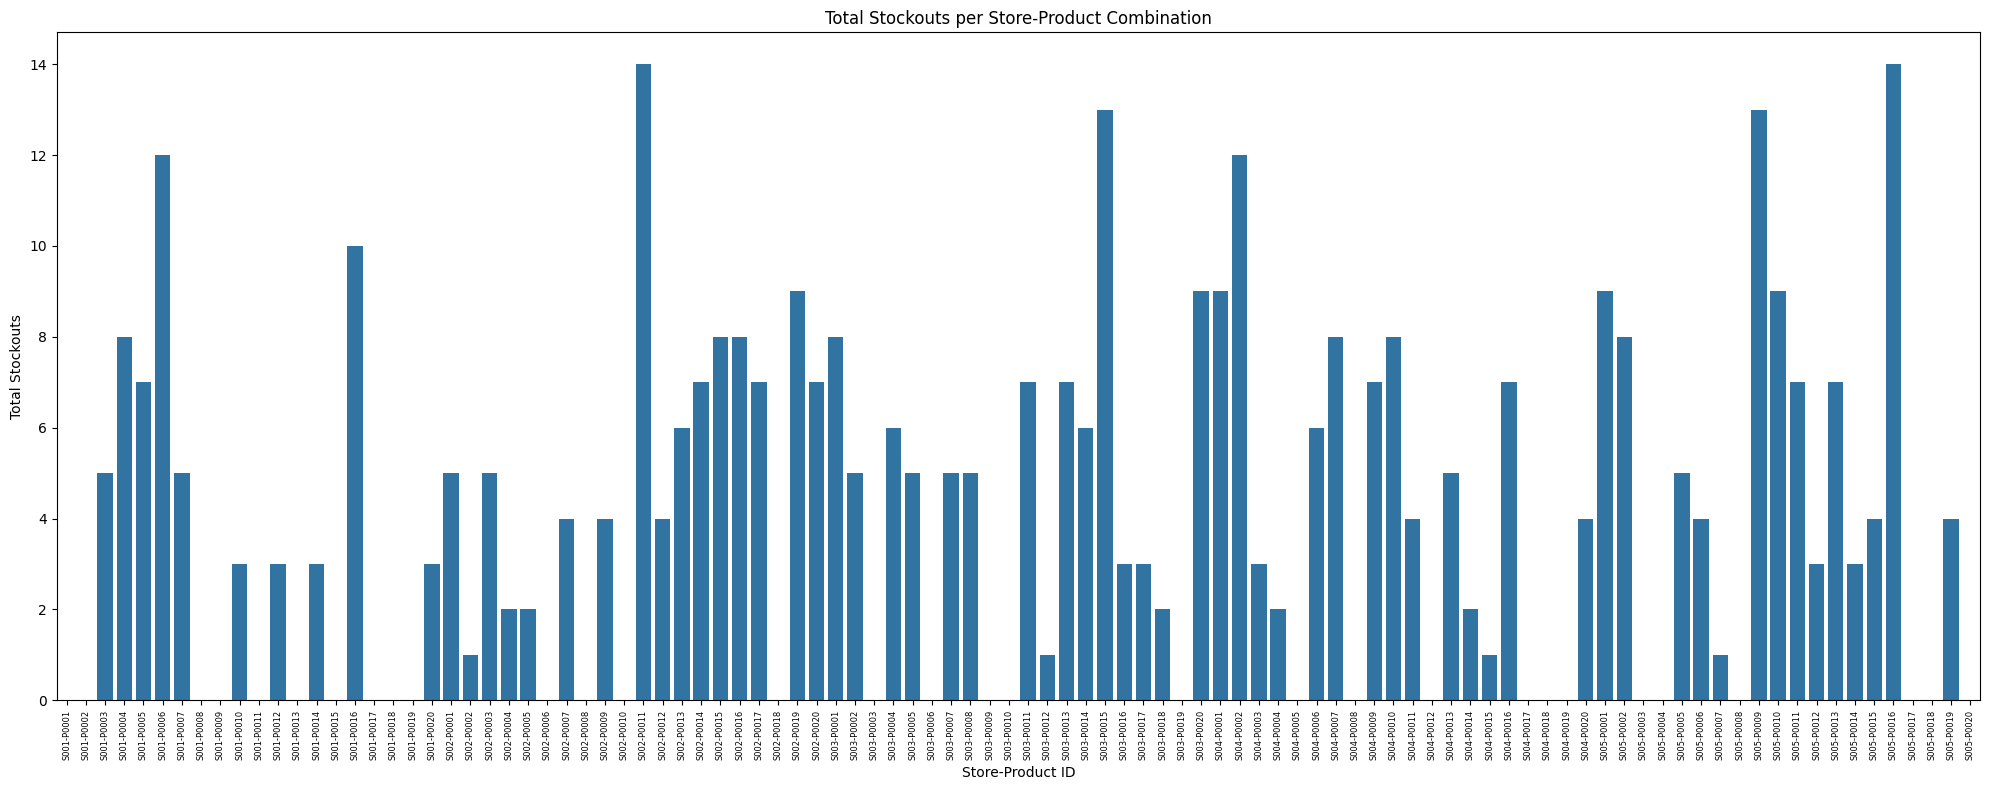


## Analysis of Stockout Patterns

### Heatmap Insights:
The heatmap visualizes the average stockout rate for each product in each store.
Darker red cells indicate a higher average stockout rate for that specific Store-Product combination.
By examining the heatmap, we can identify which stores and products have the most frequent stockouts.
For example, we can see if certain products are consistently out of stock across multiple stores or if a particular store experiences stockouts more often across various products.
This helps pinpoint problem areas at a glance.

### Histogram Insights:
The histogram (bar plot) shows the total count of stockout incidents for each unique Store-Product combination over the entire period.
Each bar represents a specific product in a specific store.
The height of the bar indicates the total number of times that product was out of stock in that store.
This plot provides a more granular view of the total stockout frequency for every individual Store-Product p

In [ ]:
# 1. Calculate total stockouts for each product
product_stockouts = df.groupby('Product ID')['stockout'].sum().reset_index()
product_stockouts_sorted = product_stockouts.sort_values(by='stockout', ascending=False)
print("## Total Stockouts per Product\n")
print(product_stockouts_sorted)

# 3. Calculate total stockouts for each store
store_stockouts = df.groupby('Store ID')['stockout'].sum().reset_index()

# 4. Sort and print store stockouts
store_stockouts_sorted = store_stockouts.sort_values(by='stockout', ascending=False)
print("\n## Total Stockouts per Store\n")
print(store_stockouts_sorted)

# 5. Create pivot table for heatmap (using mean for rate visualization)
stockout_matrix = df.pivot_table(index='Store ID', columns='Product ID', values='stockout', aggfunc='mean', fill_value=0)

# 6. Generate the heatmap
plt.figure(figsize=(15, 8)) # Adjust figure size as needed
sns.heatmap(stockout_matrix, cmap='Reds', cbar_kws={'label': 'Average Stockout Rate (0-1)'})

# 7. Add title to heatmap
plt.title('Average Stockout Rate Heatmap (Store x Product)')

# 8. Add labels to heatmap axes
plt.xlabel('Product ID')
plt.ylabel('Store ID')

# 9. Display the heatmap
plt.show()

# 10. Group by Store ID and Product ID and sum stockouts for histogram
stockout_counts = df.groupby(['Store ID', 'Product ID'])['stockout'].sum().reset_index()

# 11. Create a combined identifier for the x-axis
stockout_counts['Store-Product'] = stockout_counts['Store ID'].astype(str) + '-' + stockout_counts['Product ID'].astype(str)

# 12. Generate the bar plot (histogram)
plt.figure(figsize=(20, 8)) # Adjust figure size for better readability
sns.barplot(x='Store-Product', y='stockout', data=stockout_counts)

# 13. Add title to the bar plot
plt.title('Total Stockouts per Store-Product Combination')

# 14. Add labels to the bar plot axes
plt.xlabel('Store-Product ID')
plt.ylabel('Total Stockouts')

# 15. Rotate x-axis labels and adjust layout
plt.xticks(rotation=90, fontsize=6) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping

# 16. Display the bar plot
plt.show()


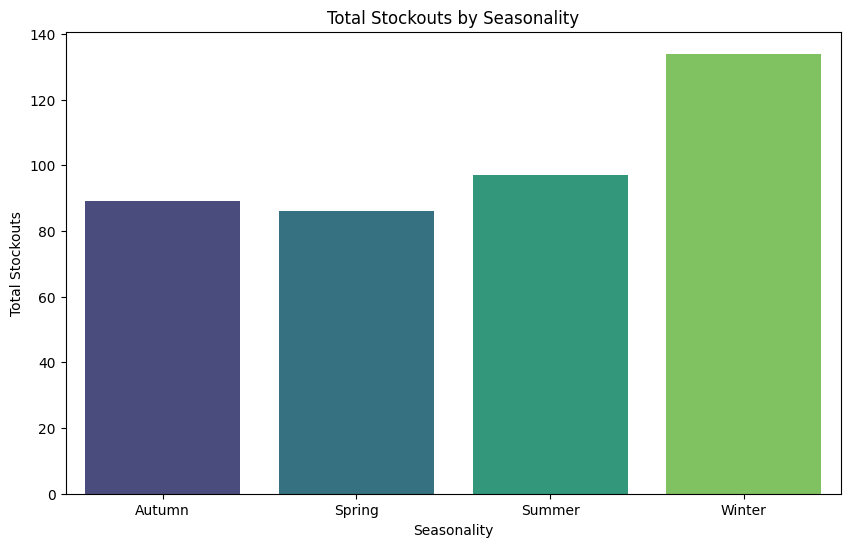

## Analysis of Total Stockouts by Seasonality

This bar plot shows the total number of stockout incidents for each season.
By examining the heights of the bars, we can see which seasons experience the highest and lowest total number of stockouts.
This helps to understand if stockouts are more prevalent during specific times of the year, which could be related to seasonal demand patterns or supply chain challenges during those periods.


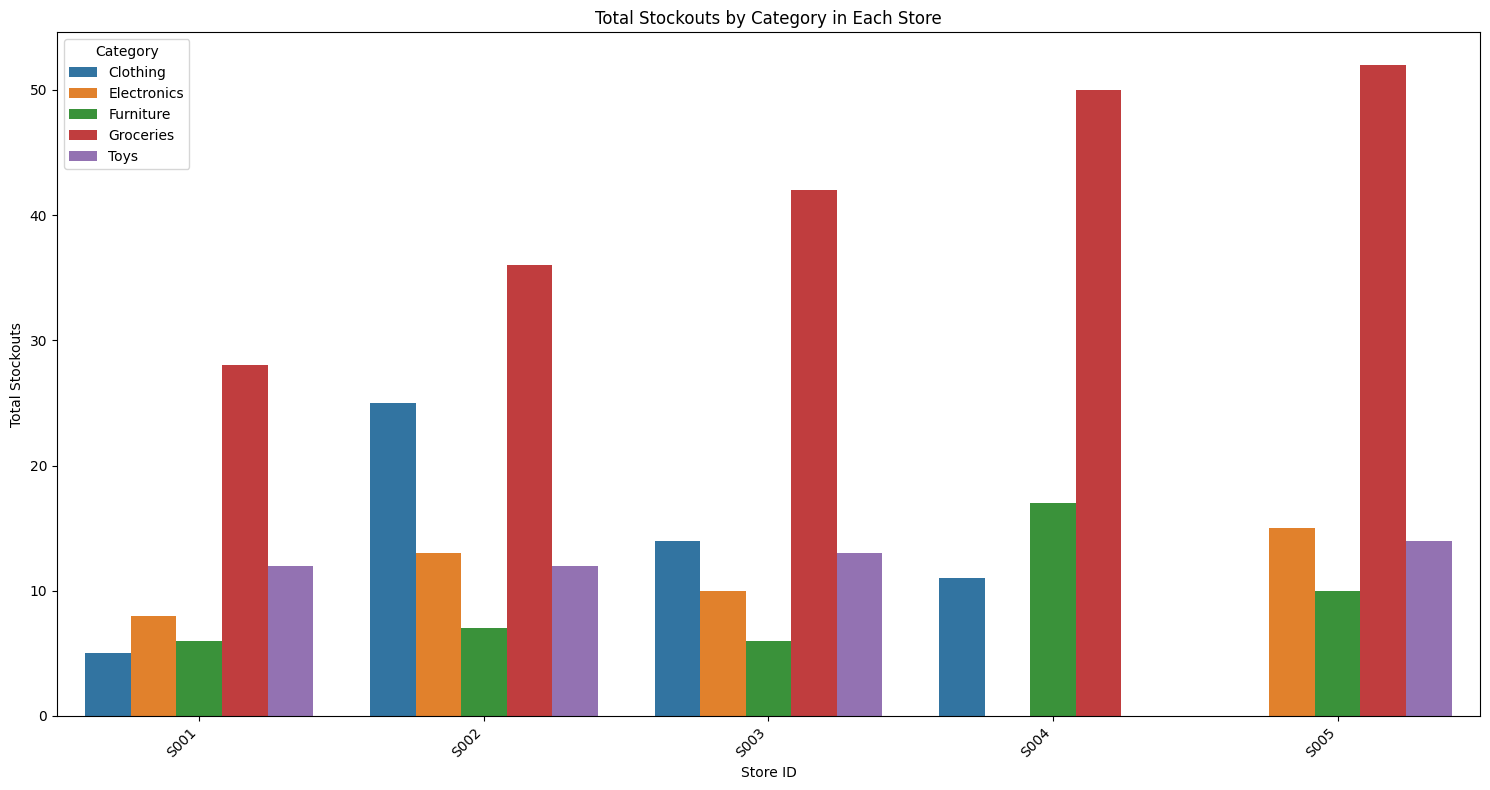


## Analysis of Total Stockouts by Category in Each Store

This grouped bar plot displays the total number of stockouts for each product category within each individual store.
Each group of bars represents a store, and the bars within each group represent different categories.
This visualization allows us to compare stockout totals across categories within a single store and also compare stockout patterns for specific categories across different stores.
It helps identify which categories are most prone to stockouts in particular stores, suggesting potential issues with inventory management, forecasting, or supply for those specific store-category combinations.


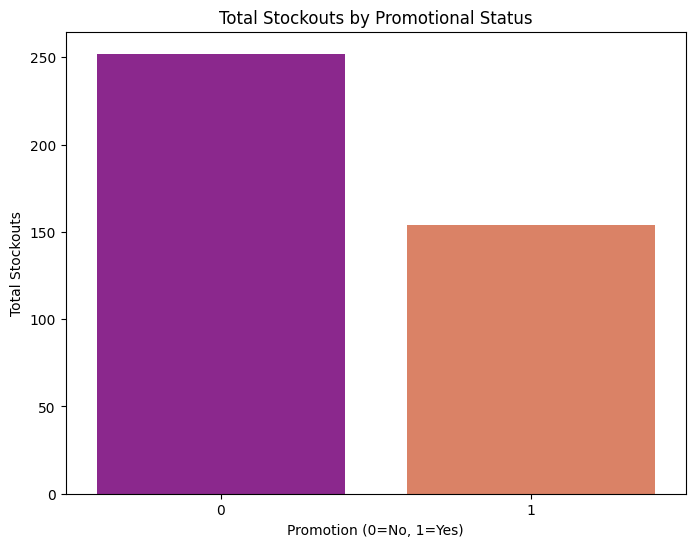


## Analysis of Total Stockouts by Promotional Status

This bar plot compares the total number of stockouts when a product is on promotion (Promotion=1) versus when it is not (Promotion=0).
A higher bar for 'Promotion=1' would suggest that running promotions is associated with a higher total number of stockouts.
This could be due to increased demand driven by the promotion that was not adequately met by inventory levels.
Conversely, if the bars are similar or lower for 'Promotion=1', it might indicate that promotions are either not significantly impacting total stockouts or that inventory planning accounts for promotional periods.


In [ ]:

stockout_by_seasonality = df.groupby('Seasonality')['stockout'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Seasonality', y='stockout', data=stockout_by_seasonality, palette='viridis')
plt.title('Total Stockouts by Seasonality')
plt.xlabel('Seasonality')
plt.ylabel('Total Stockouts')
plt.show()


stockout_by_store_category = df.groupby(['Store ID', 'Category'])['stockout'].sum().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(x='Store ID', y='stockout', hue='Category', data=stockout_by_store_category)
plt.title('Total Stockouts by Category in Each Store')
plt.xlabel('Store ID')
plt.ylabel('Total Stockouts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 7. Calculate total stockouts vs Promotional Status
stockout_by_promotion = df.groupby('Promotion')['stockout'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Promotion', y='stockout', data=stockout_by_promotion, palette='plasma')
plt.title('Total Stockouts by Promotional Status')
plt.xlabel('Promotion (0=No, 1=Yes)')
plt.ylabel('Total Stockouts')
plt.show()


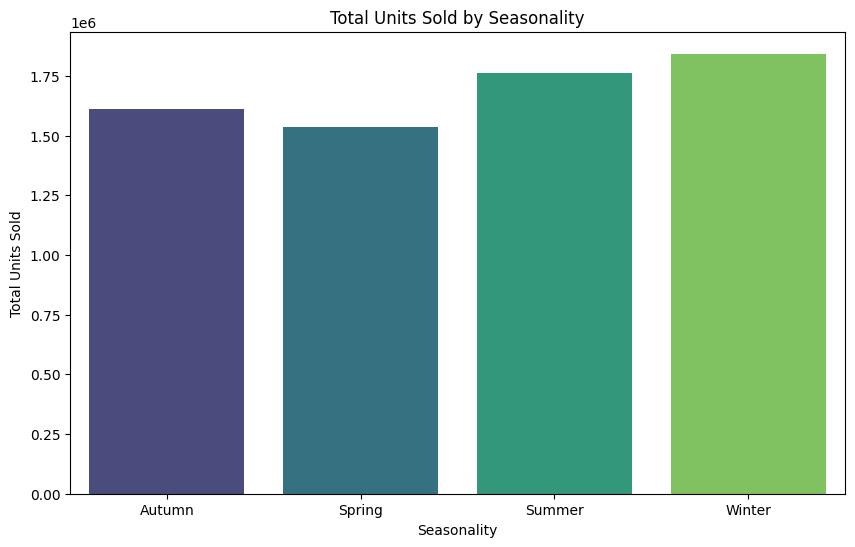

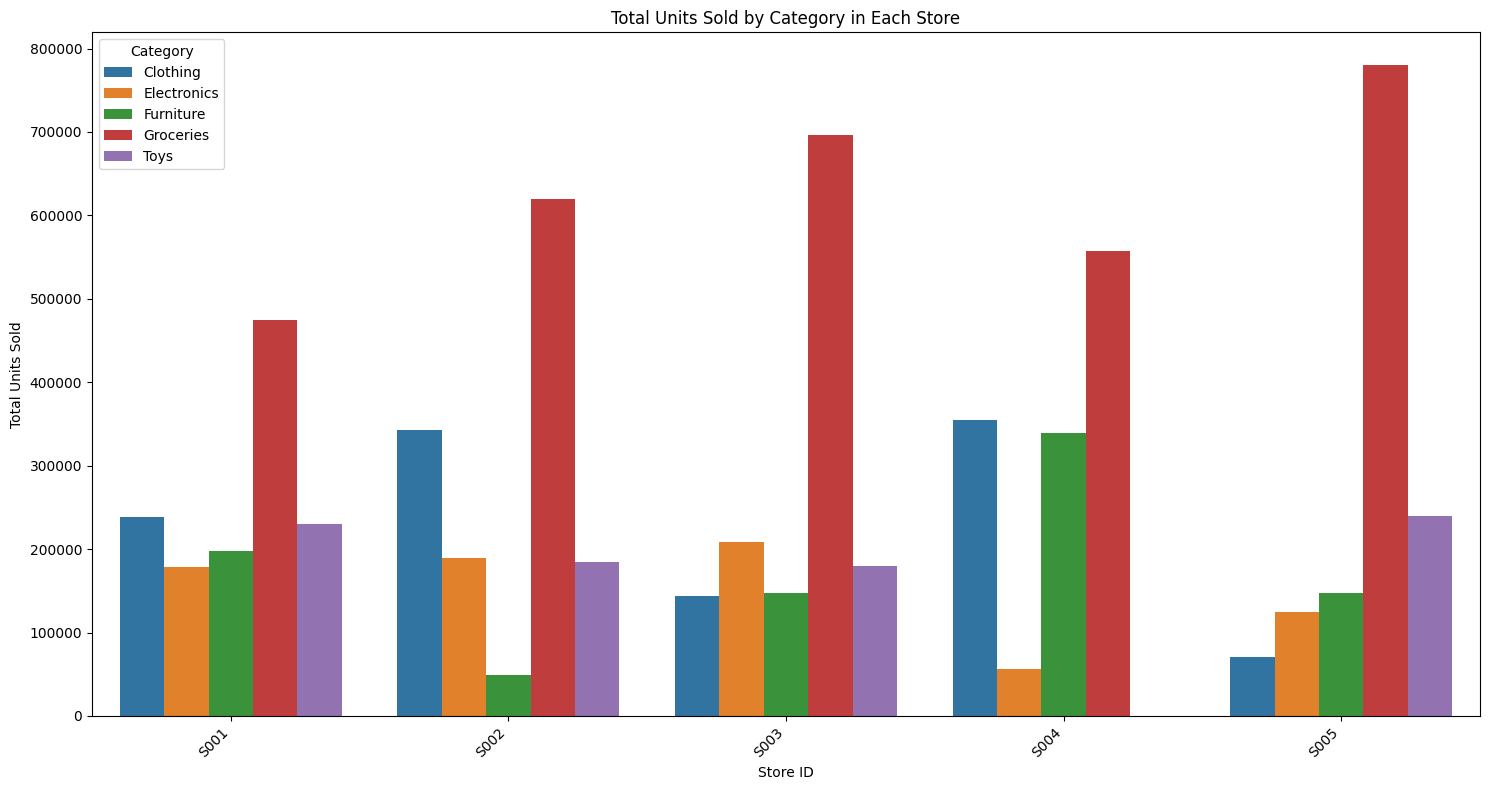

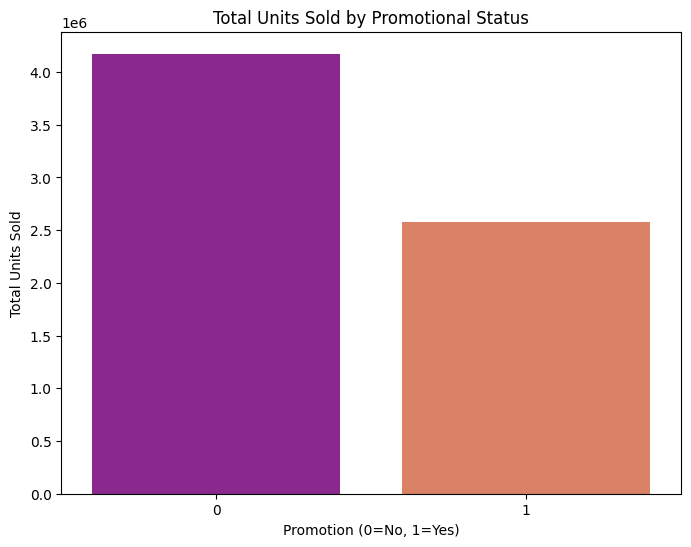


## Analysis of Units Sold Patterns

### Seasonality and Units Sold:
The plot shows the total number of units sold across different seasons.
This helps understand if sales volume has significant variations based on the time of the year.
Higher bars indicate seasons with greater sales, while lower bars indicate seasons with lower sales.
This information can be crucial for forecasting and inventory planning based on seasonal demand.

### Store, Category, and Units Sold:
This plot visualizes the total units sold for each product category within each store.
It allows us to compare the sales performance of different categories within the same store and the performance of the same category across different stores.
We can identify which store-category combinations have the highest sales and which might be underperforming.
This provides insights into the sales contribution of different product categories in specific store locations.

### Promotional Status and Units Sold:
The plot displays the

In [ ]:
# prompt: stockout_by_seasonality = df.groupby('Seasonality')['stockout'].sum().reset_index()
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Seasonality', y='stockout', data=stockout_by_seasonality, palette='viridis')
# plt.title('Total Stockouts by Seasonality')
# plt.xlabel('Seasonality')
# plt.ylabel('Total Stockouts')
# plt.show()
# stockout_by_store_category = df.groupby(['Store ID', 'Category'])['stockout'].sum().reset_index()
# plt.figure(figsize=(15, 8))
# sns.barplot(x='Store ID', y='stockout', hue='Category', data=stockout_by_store_category)
# plt.title('Total Stockouts by Category in Each Store')
# plt.xlabel('Store ID')
# plt.ylabel('Total Stockouts')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()
# # 7. Calculate total stockouts vs Promotional Status
# stockout_by_promotion = df.groupby('Promotion')['stockout'].sum().reset_index()
# plt.figure(figsize=(8, 6))
# sns.barplot(x='Promotion', y='stockout', data=stockout_by_promotion, palette='plasma')
# plt.title('Total Stockouts by Promotional Status')
# plt.xlabel('Promotion (0=No, 1=Yes)')
# plt.ylabel('Total Stockouts')
# plt.show()
#  Give the same but for Total units sold

import matplotlib.pyplot as plt
# Analyze and visualize the *total* number of units sold versus Seasonality
units_sold_by_seasonality = df.groupby('Seasonality')['Units Sold'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Seasonality', y='Units Sold', data=units_sold_by_seasonality, palette='viridis')
plt.title('Total Units Sold by Seasonality')
plt.xlabel('Seasonality')
plt.ylabel('Total Units Sold')
plt.show()

# Analyze and visualize the *total* number of units sold versus Category within each store
units_sold_by_store_category = df.groupby(['Store ID', 'Category'])['Units Sold'].sum().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(x='Store ID', y='Units Sold', hue='Category', data=units_sold_by_store_category)
plt.title('Total Units Sold by Category in Each Store')
plt.xlabel('Store ID')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze and visualize the *total* number of units sold versus Promotional Status
units_sold_by_promotion = df.groupby('Promotion')['Units Sold'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Promotion', y='Units Sold', data=units_sold_by_promotion, palette='plasma')
plt.title('Total Units Sold by Promotional Status')
plt.xlabel('Promotion (0=No, 1=Yes)')
plt.ylabel('Total Units Sold')
plt.show()


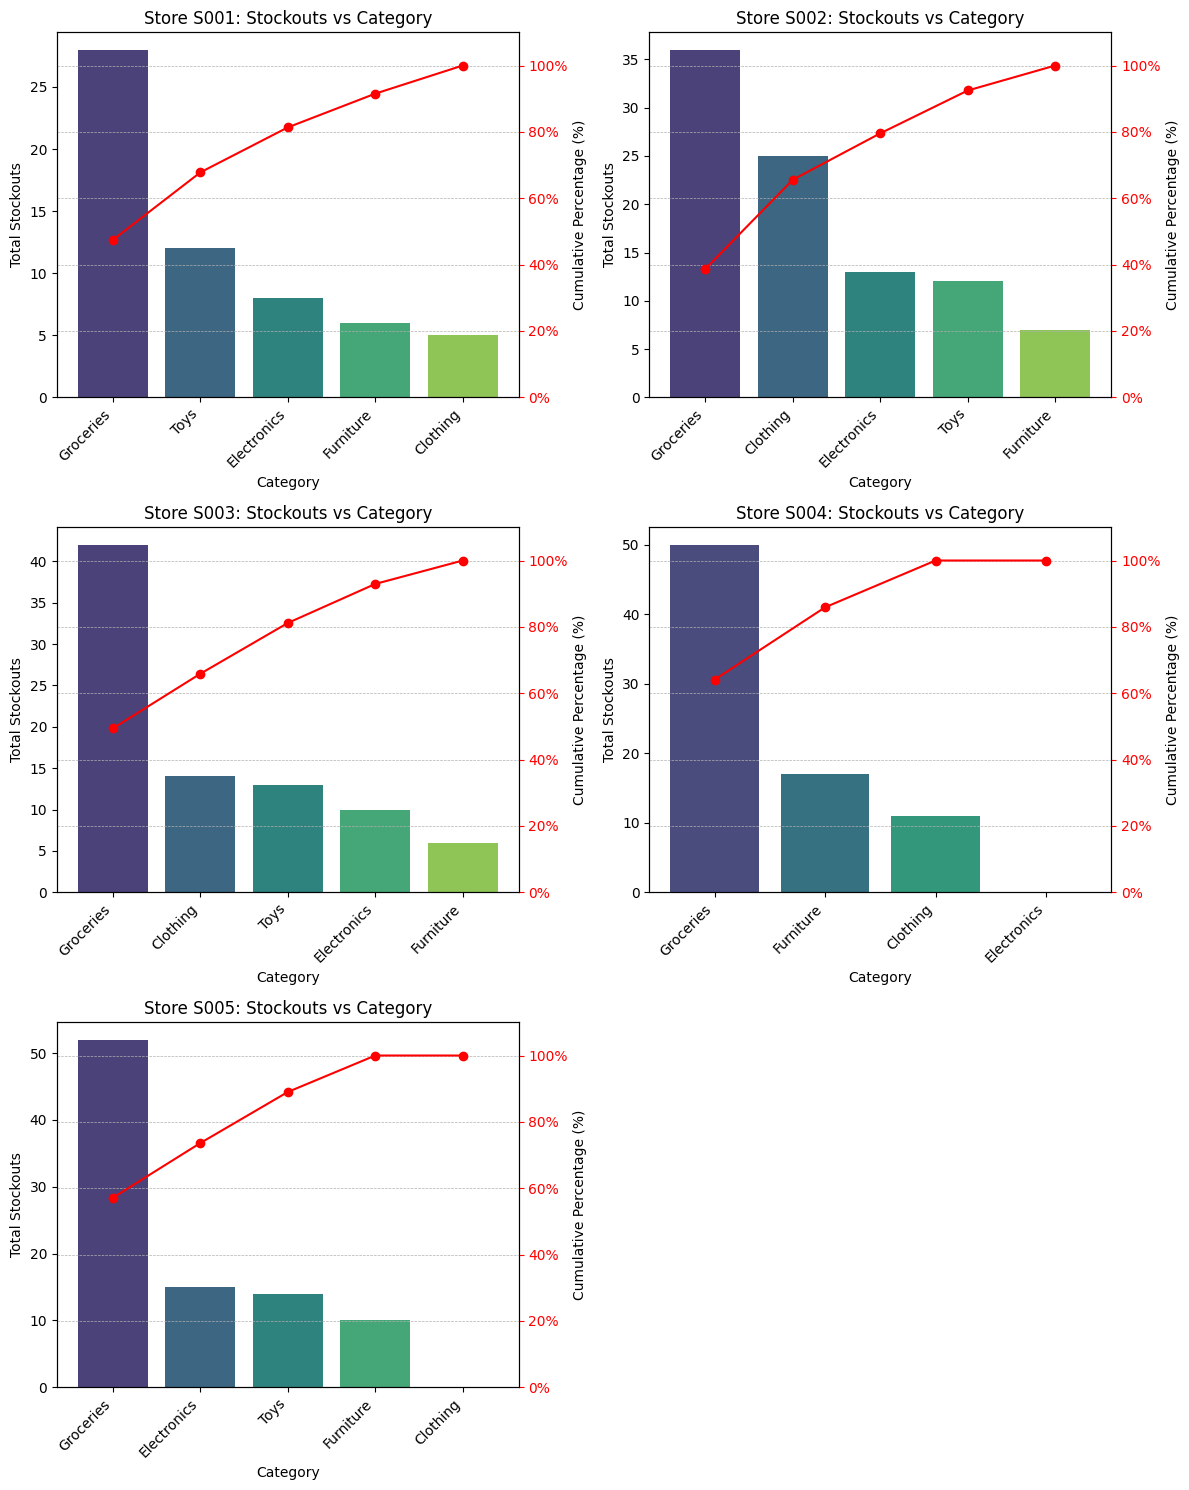

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import PercentFormatter


required_columns_pareto = ['stockout', 'Category', 'Store ID']
if not all(col in df.columns for col in required_columns_pareto):
  print("Error: Missing required columns for Pareto chart in the dataframe.")
else:

  stores = df['Store ID'].unique()

  n_stores = len(stores)
  n_cols = min(2, n_stores)
  n_rows = (n_stores + n_cols - 1) // n_cols

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5)) # Adjust overall figure size
  axes = axes.flatten()

  for i, store in enumerate(stores):
    ax1 = axes[i]


    store_data = df[df['Store ID'] == store].copy()

    stockout_by_category_store = store_data.groupby('Category')['stockout'].sum().sort_values(ascending=False).reset_index()

    if not stockout_by_category_store.empty and stockout_by_category_store['stockout'].sum() > 0:
      stockout_by_category_store['cumulative_stockout'] = stockout_by_category_store['stockout'].cumsum()
      stockout_by_category_store['cumulative_percentage'] = (stockout_by_category_store['cumulative_stockout'] / stockout_by_category_store['stockout'].sum()) * 100

      sns.barplot(x='Category', y='stockout', data=stockout_by_category_store, ax=ax1, palette='viridis')
      ax1.set_title(f'Store {store}: Stockouts vs Category')
      ax1.set_xlabel('Category')
      ax1.set_ylabel('Total Stockouts')
      ax1.tick_params(axis='x', rotation=45)

      ax1.set_xticklabels(stockout_by_category_store['Category'], rotation=45, ha='right')



      ax2 = ax1.twinx()
      ax2.plot(stockout_by_category_store['Category'], stockout_by_category_store['cumulative_percentage'], color='red', marker='o', linestyle='-')
      ax2.set_ylabel('Cumulative Percentage (%)')
      ax2.tick_params(axis='y', colors='red')
      ax2.set_ylim(0, 110)
      ax2.yaxis.set_major_formatter(PercentFormatter())

      ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

    else:
      fig.delaxes(axes[i])
      print(f"No stockout data available or total stockouts are zero for Store {store} to generate a Pareto chart.")

  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()